<a href="https://colab.research.google.com/github/AlexdeLuna79/Datamining/blob/main/ArboldeDecision_Practica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uso del árbol de decisión como clasificador en la base de datos de Breast Cancer

In [ ]:
# Librerías de Clasificación
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

#Manejo de dataset y arrays
import pandas as pd
import numpy as np


# pretty printing
from pprint import pprint

# Librerías de Visualización
import matplotlib.pyplot as plt
#from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
data = load_breast_cancer()

In [ ]:
print("Tamaño de la matriz: " + repr(data.data.shape))

Tamaño de la matriz: (569, 30)


In [ ]:
#Nombres de los atributos del Dataset
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
#Nombre de los Objetivos (Target)
print(data.target_names)

['malignant' 'benign']


In [ ]:
# División de datos en Entrenamiento y Prueba (Train, Test)
# Para términos prácticos solo se tomaron las primeras 10 características
name_feat=data.feature_names[0:9]
X_train, X_test, y_train, y_test = train_test_split(data.data[:,0:9],data.target,shuffle=True,test_size=0.3, random_state=42)

In [ ]:
# Árbol de decisión (DECISION TREE)
# Inicialización del modelo con los parametros estandares, considerando la entropia como criterio
# class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
clf_dt = DecisionTreeClassifier(criterion="entropy")
# Entrenamiento del Modelo
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

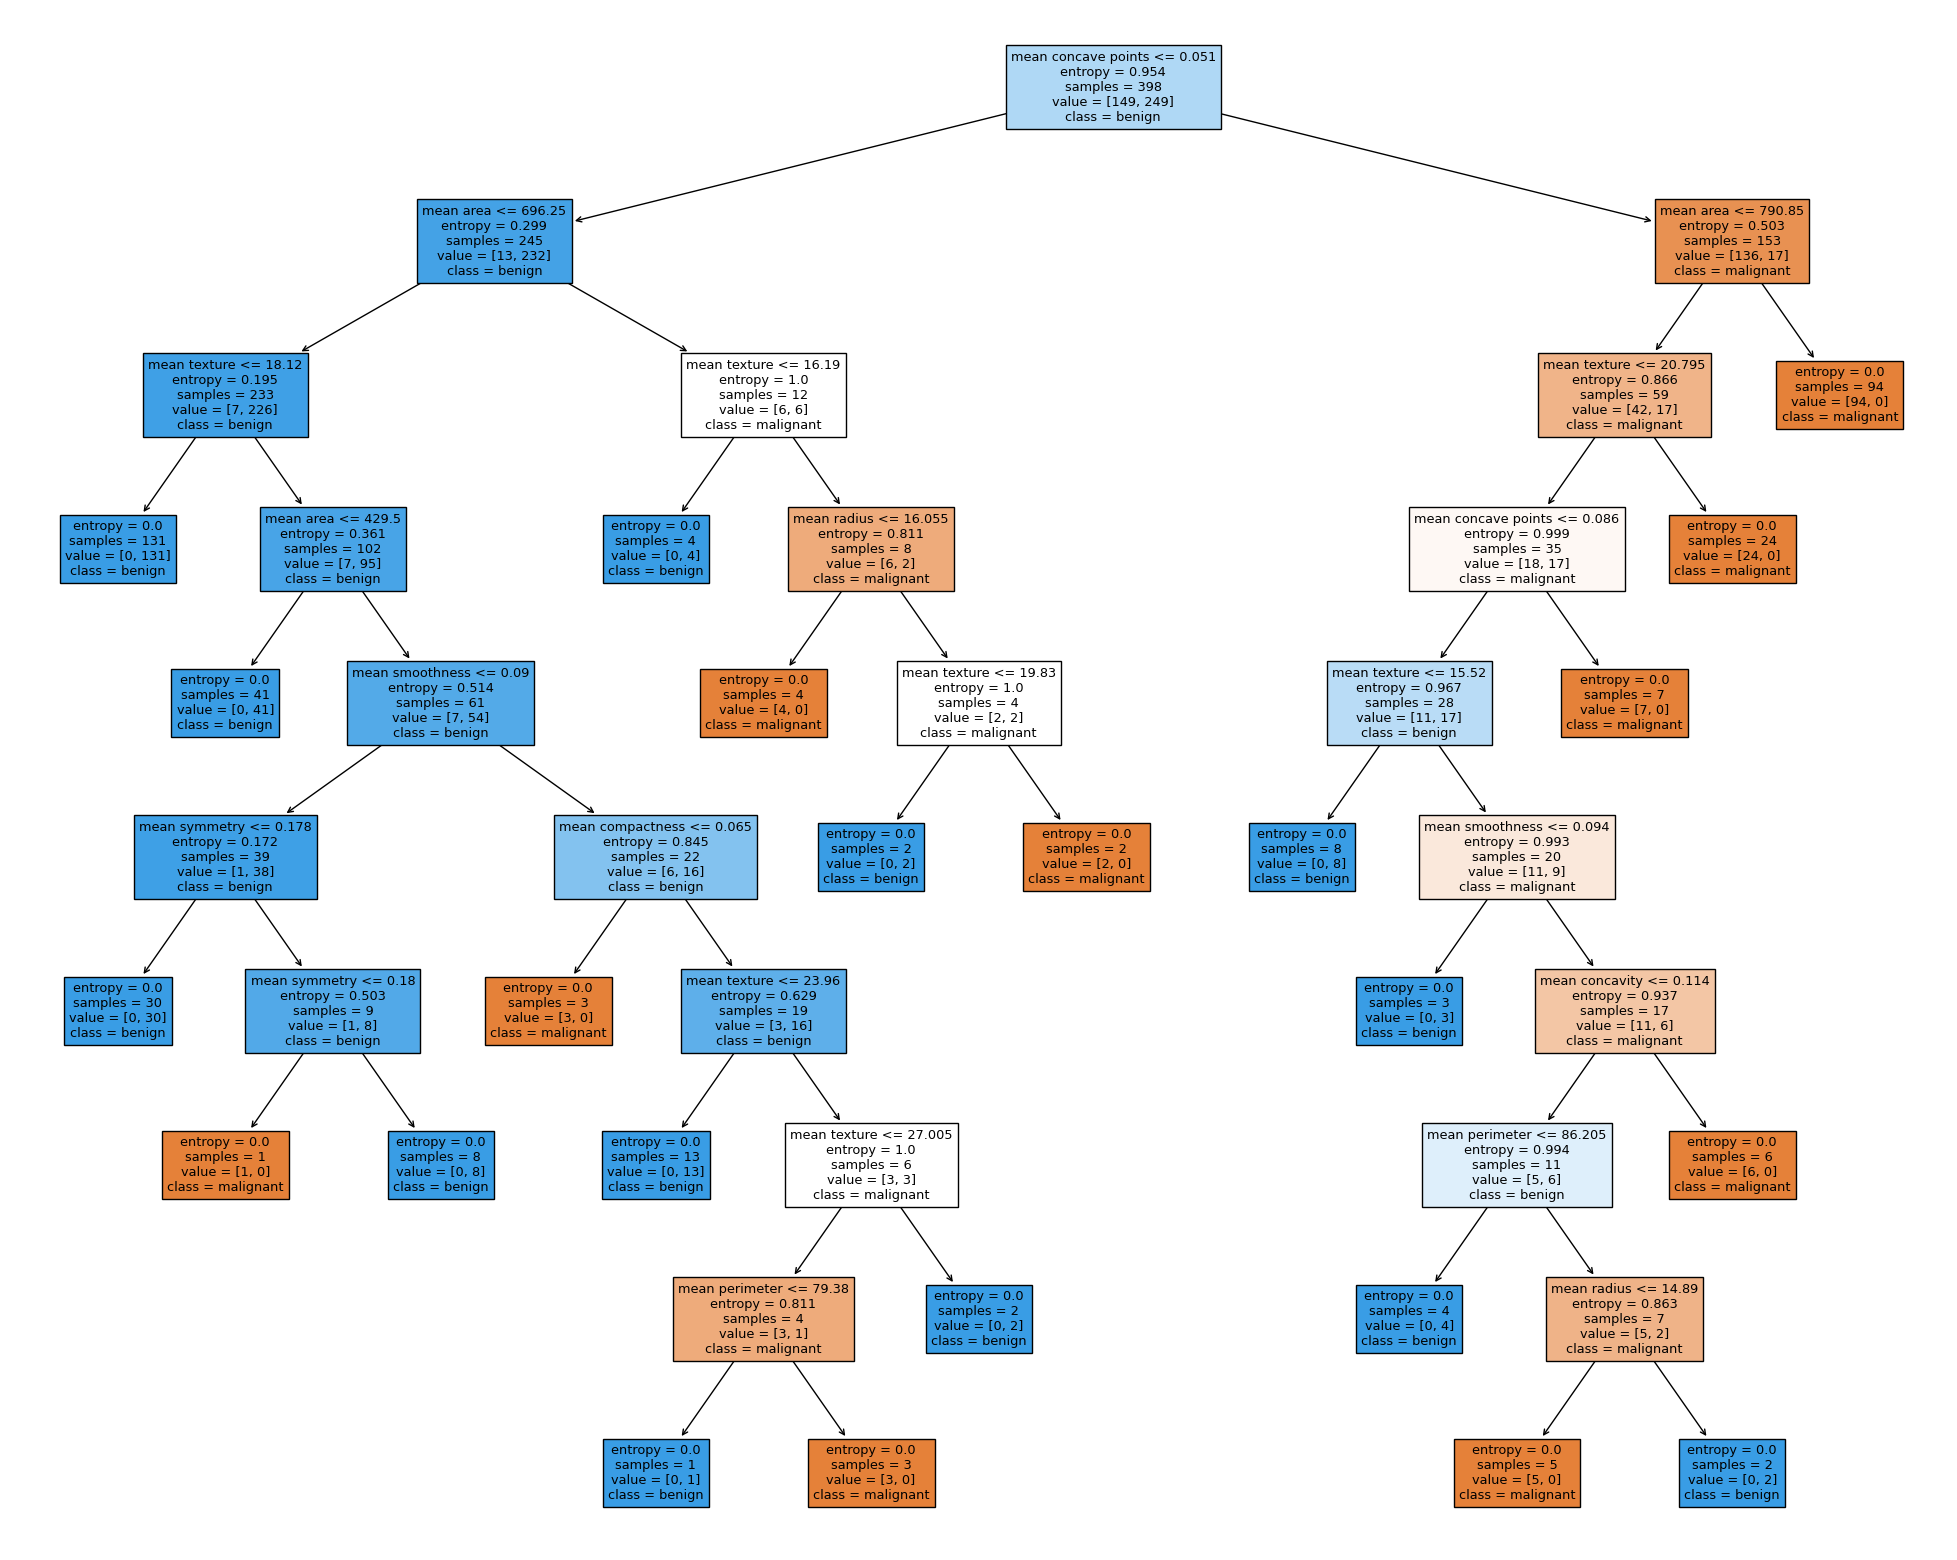

In [ ]:
#Gráficar el árbol de decisión
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf_dt, feature_names=data.feature_names,
                   class_names=data.target_names, filled=True)
plt.show()

In [ ]:
Rango=X_train.shape[1]

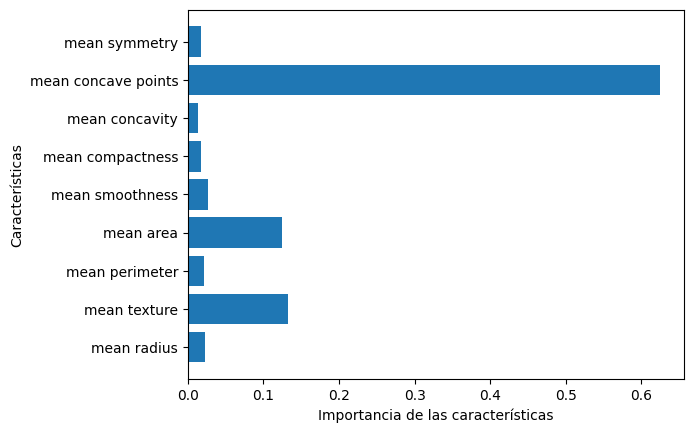

In [ ]:
#Importancia de las características en el árbol
plt.barh(range(Rango),clf_dt.feature_importances_)
plt.yticks(np.arange(Rango),name_feat)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()

In [ ]:
# Evaluación del set de entrenamiento
y_train_pred = clf_dt.predict(X_train);
a_dt_train = accuracy_score(y_train, y_train_pred);
print("La precisión (accuracy) del set de entrenamiento es: " + repr(a_dt_train))

La precisión (accuracy) del set de entrenamiento es: 1.0


Si la precisión (accuracy) del set de entrenamiento es 1, existe la posibilidad de que se tenga un Sobreajuste (Overfitting).

Se denomina sobreajuste al hecho de hacer un modelo tan ajustado a los datos de entrenamiento que haga que no generalice bien a los datos de test.

El sobreajuste se produce cuando un sistema de aprendizaje automático se entrena demasiado o con datos anómalos, que hace que el algoritmo «aprenda» patrones que no son generales.

¿Cómo evitar el sobreajuste?

El sobreajuste se puede evitar de varias formas, las más claras son las siguientes:

Incorporando mayor cantidad de datos: al tener más cantidad de datos es más probable que el algoritmo generalice mejor, al tener en cuenta más tipos de datos.

Cambiando los parámetros de ciertos algoritmos, haciendo los algoritmos más simples: haciendo que el algoritmo sea más simple, se ajusta menos a los datos y es menos posible sobreajustar a los datos de entrenamiento. Por ejemplo, reduciendo la profundidad de un árbol de decisión se ajusta menos al hacer el modelo más simple.

<ipython-input-12-d10360232193>:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


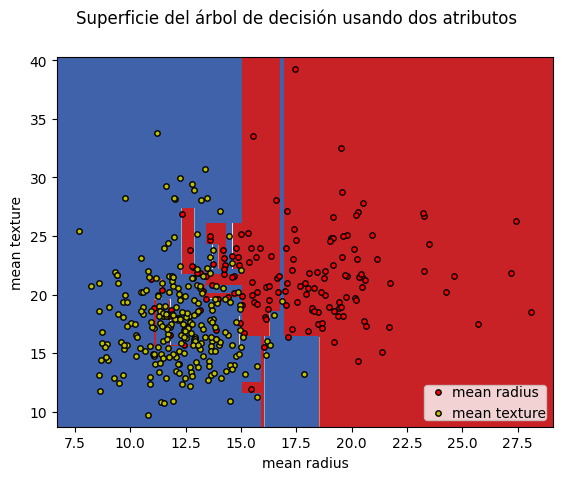

In [ ]:
# Parameters
n_classes = 2
plot_colors = "ryb"
plot_step = 0.02

X=X_train[:,[0,1]]
Y=y_train
clf = DecisionTreeClassifier().fit(X, Y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel(name_feat[0])
plt.ylabel(name_feat[1])

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(Y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=name_feat[i],
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
        )

plt.suptitle("Superficie del árbol de decisión usando dos atributos")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

In [ ]:
#Si existe un sobreajuste se debe cambiar el árbol
# modelo dos, con control de profundiad de 5 nodos

clf_dt = DecisionTreeClassifier(criterion="entropy", max_depth=5)

In [ ]:
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

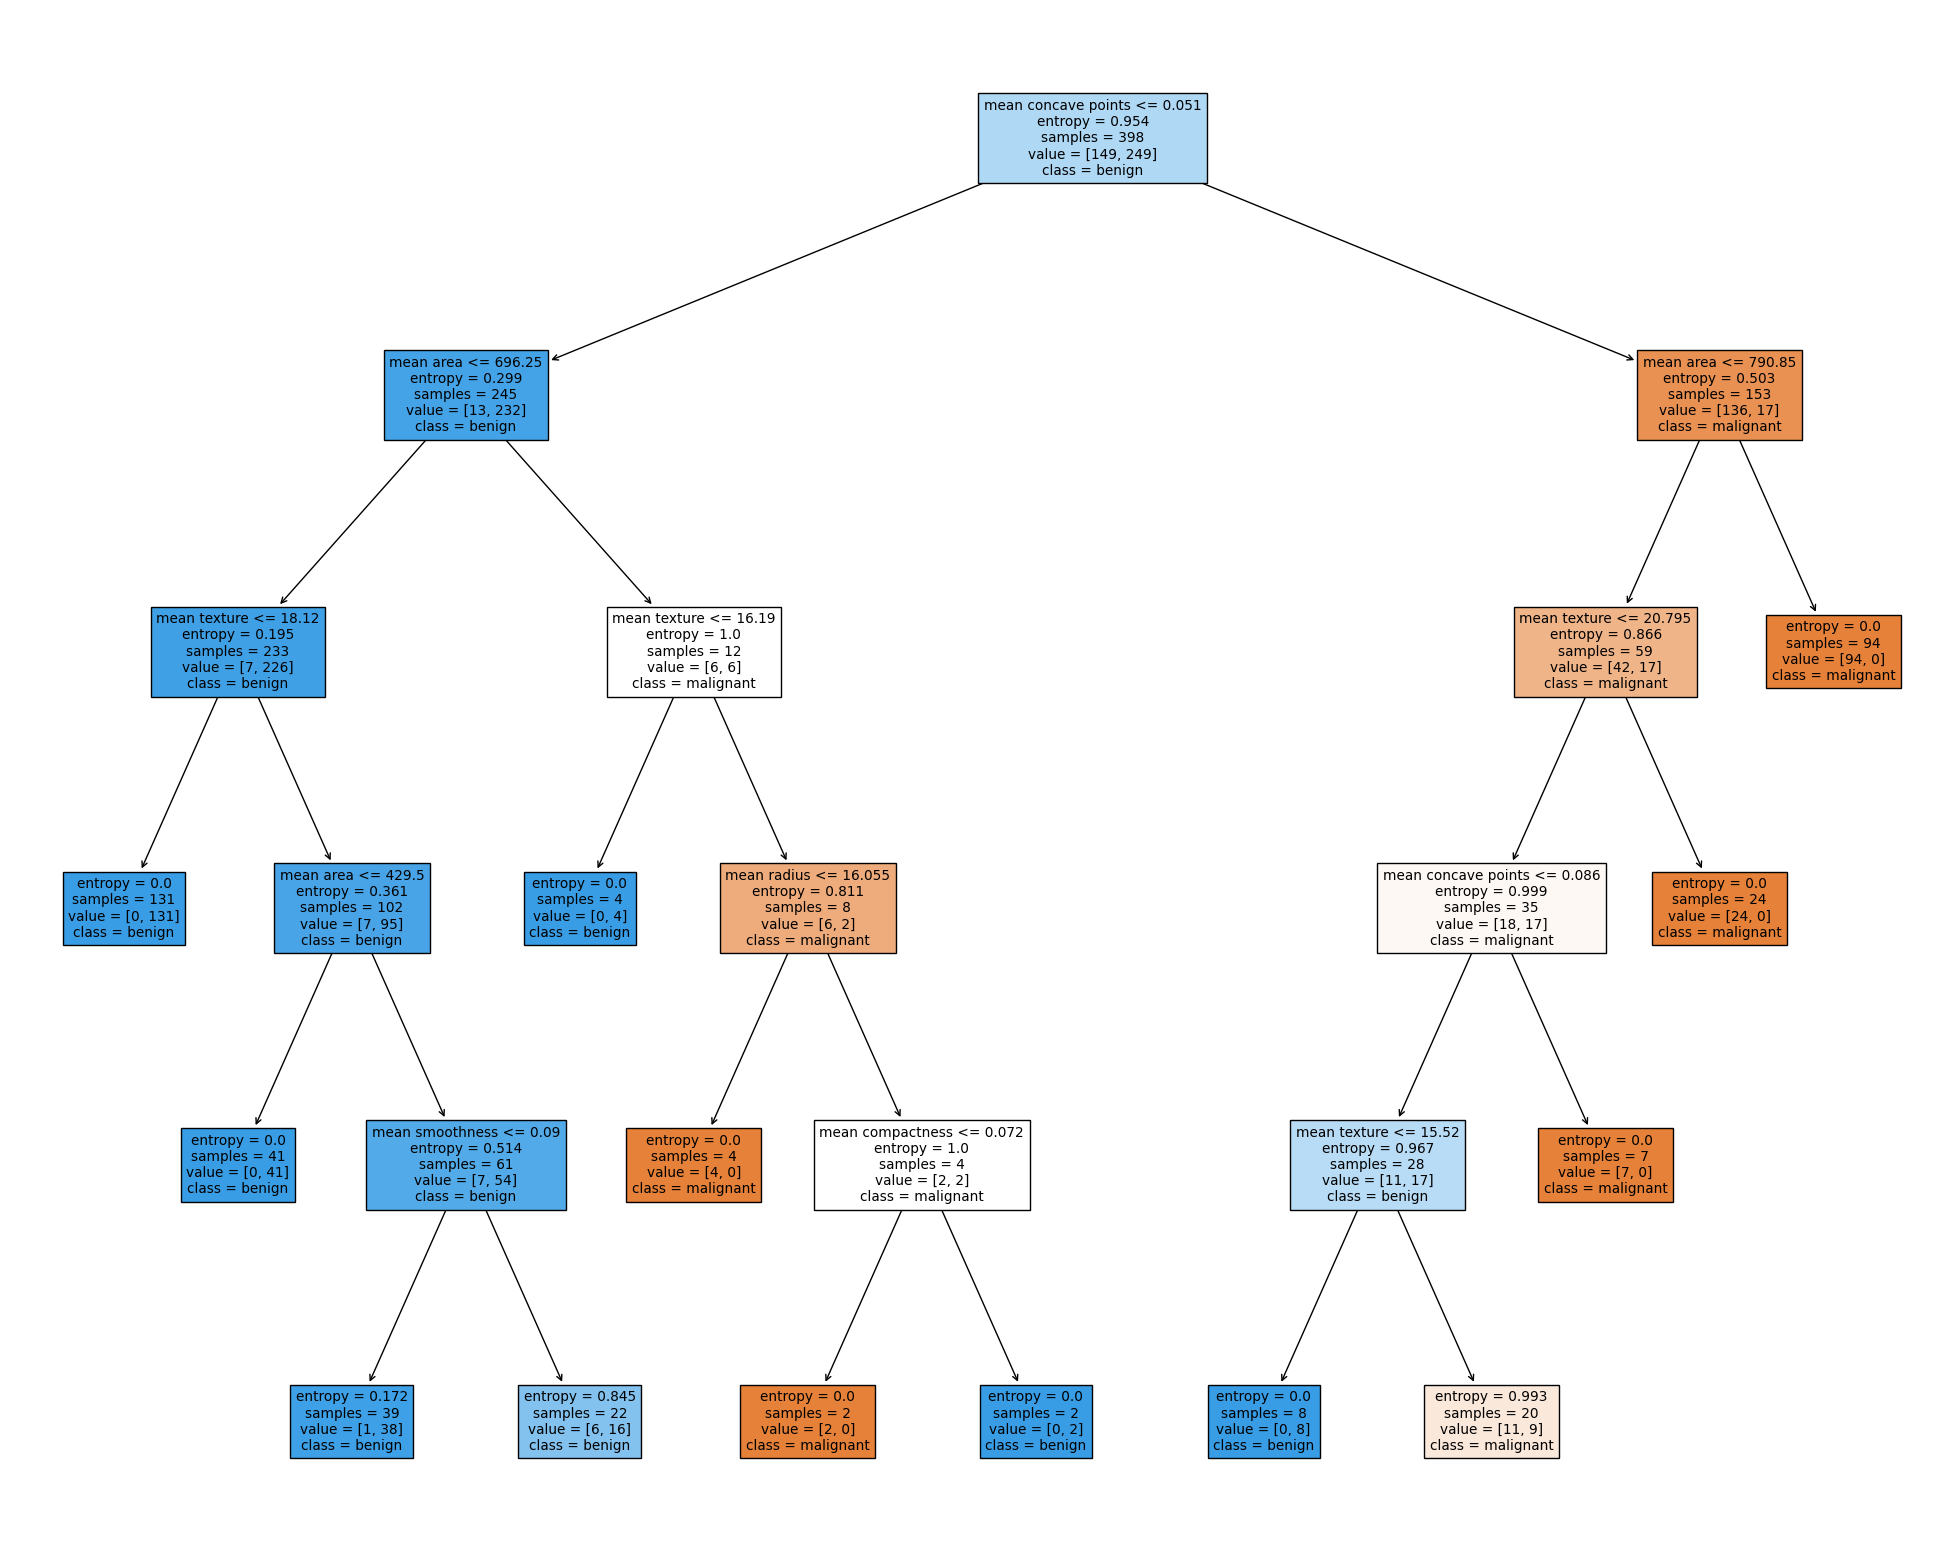

In [ ]:
#Gráficar el árbol de decisión
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf_dt, feature_names=data.feature_names,
                   class_names=data.target_names, filled=True)
plt.show()

In [ ]:
# Evaluación del set de entrenamiento
y_train_pred = clf_dt.predict(X_train);
a_dt_train = accuracy_score(y_train, y_train_pred);
print("La precisión (accuracy) del set de entrenamiento es: " + repr(a_dt_train))

La precisión (accuracy) del set de entrenamiento es: 0.9597989949748744


In [ ]:
# Evaluating on the test data
y_test_pred = clf_dt.predict(X_test);
a_dt_test = accuracy_score(y_test, y_test_pred);

print("Test data accuracy is " +  repr(a_dt_test))

Test data accuracy is 0.9590643274853801


In [ ]:
# Ejemplo cross-validation
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=10)

In [ ]:
precision_train = []
precision_test = []

for train_index, test_index in skf.split(X_train, y_train):
  X_train1, X_test1 = X_train[train_index], X_train[test_index]
  y_train1, y_test1 = y_train[train_index], y_train[test_index]
  clf_dt.fit(X_train1,y_train1)
  y_train_pred = clf_dt.predict(X_train1);
  a_dt_train = accuracy_score(y_train1, y_train_pred);
  precision_train.append(a_dt_train)

  y_train_pred = clf_dt.predict(X_test1);
  a_dt_train = accuracy_score(y_test1, y_train_pred);
  precision_test.append(a_dt_train)


In [ ]:
precision_train
print("La media de precision con la cross validation es ",np.mean(precision_test))
print("La desviación estándar de precision con la cross validation es ",np.std(precision_train))

La media de precision con la cross validation es  0.9298717948717948
La desviación estándar de precision con la cross validation es  0.008466808972317929


In [ ]:
precision_test

[0.9,
 0.975,
 0.875,
 0.925,
 0.9,
 0.975,
 0.9,
 0.9,
 0.9743589743589743,
 0.9743589743589743]